In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df.columns = df.columns.str.lower()

in the next i filled up NAN values of age with the mean each and cabin with linear interpolation and fare with the forward fill

In [6]:
df['age'] = df['age'].fillna(df['age'].mean())
df['cabin'] = df['cabin'].fillna(df['cabin'].mode()[0])
df['fare'] = df['fare'].fillna(method ='ffill')

In [7]:
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [8]:
#getting dummies from all categoriocal values
for col in df.dtypes[df.dtypes == 'object'].index:
    dummified = df.pop(col)
    df= pd.concat([df, pd.get_dummies(dummified, prefix = col)], axis=1)
df.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,"name_Abbott, Master. Eugene Joseph","name_Abelseth, Miss. Karen Marie","name_Abelseth, Mr. Olaus Jorgensen",...,cabin_F E46,cabin_F E57,cabin_F G63,cabin_F2,cabin_F33,cabin_F4,cabin_G6,embarked_C,embarked_Q,embarked_S
0,892,0,3,34.5,0,0,7.8292,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,0,3,27.0,0,0,8.6625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Feature Engineering**

In [9]:
#Now we will start
target = df['survived']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size = 0.25)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = rf.predict(x_test)

In [13]:
#metrics of auc and roc_curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

1.0

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 5, 6, 7, 45, 100]
training_results = []
testing_results = []

for val in n_estimators:
    #training
    # Train the Random Forest classifier with 'val' number of estimators
    rf = RandomForestClassifier(n_estimators=val, n_jobs=1)
    rf.fit(x_train, y_train)
    
    # Predict on the training data
    pred_train = rf.predict(x_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
    
    # Calculate the AUC for training data
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # Append the AUC for training data to the list
    training_results.append(roc_auc_train)
    
    #testing
    # Predict on the testing data
    pred_test = rf.predict(x_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)
    
    # Calculate the AUC for testing data
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Append the AUC for testing data to the list
    testing_results.append(roc_auc_test)


In [30]:
print(testing_results)
print(f'\n Training Results are: {training_results}')

[0.9921875, 0.9312118902439024, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

 Training Results are: [0.9975247524752475, 0.9704977254482205, 0.9954954954954955, 1.0, 1.0, 1.0, 1.0, 1.0]


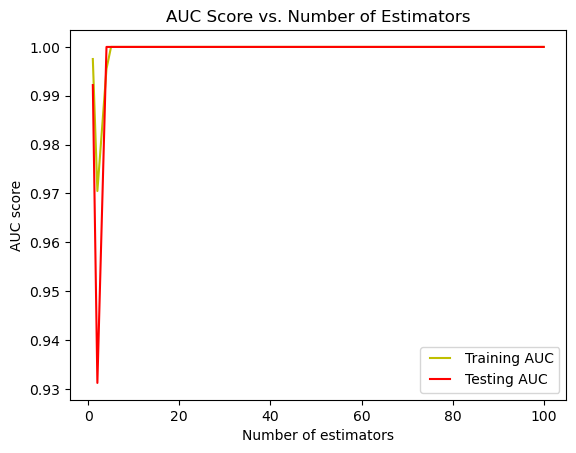

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# Plotting
line1, = plt.plot(n_estimators, training_results, 'y', label="Training AUC")
line2, = plt.plot(n_estimators, testing_results, 'r', label="Testing AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2), line2: HandlerLine2D(numpoints=2)})
plt.xlabel('Number of estimators')
plt.ylabel('AUC score')
plt.title('AUC Score vs. Number of Estimators')
plt.show()


The above observation provides us that the **auc score of training data** gets better when the **number of trees are 2, 4 or 5** and then it represents a straight line. On the other hand, the **testing data's auc score** gets better when the **no. of trees** were **greater than 2 and less or equal to 5** and afterwards it is same as training.